_This notebook was authored by Balasurya on 3 June 2022_

_Reference : Deep Learning from Scratch by Seth Weidman (O’Reilly). Copyright 2019 Seth Weidman, 978-1-492-04141-2._
https://github.com/SethHWeidman/DLFS_code

In [70]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Callable, List

# Derivatives

### Using the formula
![differentiation](images/differentiation_formula.png)

## Simple functions and their derivatives

In [71]:
def squaring(x: ndarray) -> ndarray:
    return x**2

In [72]:
def relu(x: ndarray) -> ndarray:
    return np.clip(x, 0, None)

In [73]:
def compute_derivatives(func: Callable[[ndarray], ndarray],
                        x: ndarray,
                        delta: float = 0.001) -> ndarray:
    return (func(x+delta) - func(x-delta)) / (2*delta)

In [74]:
x = np.linspace(-5, 5, 11)
x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

Squaring curve


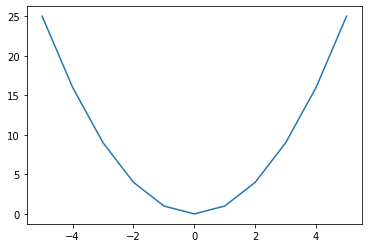

In [75]:
print("Squaring curve")
plt.plot(x, squaring(x))
plt.show()

In [76]:
print("Points and derivatives of square function")
print(x)
print(compute_derivatives(squaring, x)) # Square function

Points and derivatives of square function
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]


Relu curve


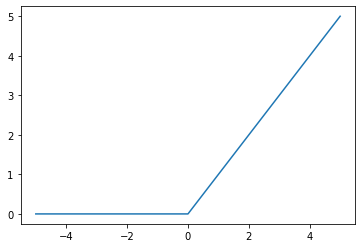

In [77]:
print("Relu curve")
plt.plot(x, relu(x))
plt.show()

In [78]:
print("Points and derivatives of relu function")
print(x)
print(compute_derivatives(relu, x)) # Relu function

Points and derivatives of relu function
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[0.  0.  0.  0.  0.  0.5 1.  1.  1.  1.  1. ]


## Chain rule

### Defining Nested Functions in Python

In [79]:
Array_function = Callable[[ndarray], ndarray]

In [80]:
Chain = List[Array_function]

In [81]:
def chain_length_2(chain: Chain, 
                  x: ndarray) -> ndarray:
    assert len(chain) == 2
    f1 = chain[0]
    f2 = chain[1]
    x = f1(f2(x))
    return x

In [82]:
# Define functions

def square(x: ndarray) -> ndarray:
    return x**2

def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1+np.exp(-x))

In [83]:
function_chain = [square, sigmoid]

In [84]:
chain_length_2(function_chain, x)

array([4.47942535e-05, 3.23503749e-04, 2.24921345e-03, 1.42093366e-02,
       7.23294881e-02, 2.50000000e-01, 5.34446645e-01, 7.75803493e-01,
       9.07397467e-01, 9.64351084e-01, 9.86659092e-01])

### Chain rule for computing derivatives of nested functions

![chain_rule](images/chain_rule.png)

In [192]:
x = np.arange(-3, 3, 0.01)
function_chain = [sigmoid, square]

 #### Notations
 y &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= f1(f2(x))<br>
 dy/dx = f1'(f2(x)) * f2'(x)<br>
 
 Considering <br>1. __f1'(f2(x)) = df1__,  <br>2. __f2'(x) = df2__

In [193]:
def chain_rule_2(chain: Chain, 
                x: ndarray) -> ndarray:
    f1 = chain[0]
    f2 = chain[1]
    
    df2 = compute_derivatives(f2, x)
    h = f2(x)
    df1 = compute_derivatives(f1, h)
    
    return df1*df2

In [194]:
derivs = chain_rule_2(function_chain, x)

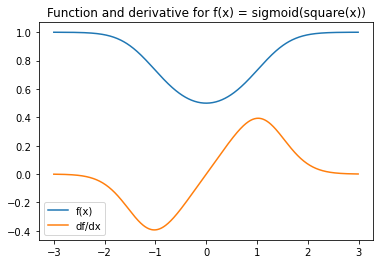

In [195]:
sns.lineplot(x=x, y=chain_length_2(function_chain, x), )
sns.lineplot(x=x, y=derivs)
plt.title("Function and derivative for f(x) = sigmoid(square(x))")
plt.legend(labels=['f(x)', 'df/dx'])
plt.show()


In [196]:
function_chain = [square, sigmoid]
derivs = chain_rule_2(function_chain, x)

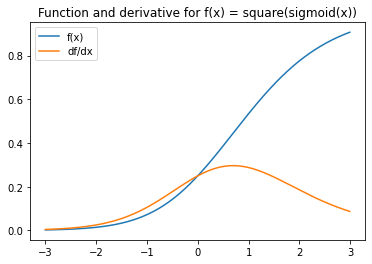

In [197]:
sns.lineplot(x=x, y=chain_length_2(function_chain, x), )
sns.lineplot(x=x, y=derivs)
plt.title("Function and derivative for f(x) = square(sigmoid(x))")
plt.legend(labels=['f(x)', 'df/dx'])
plt.show()


### More Complex Example
y = f1(f2(f3(x)))

y' = f1'(f2(f3(x))) * f2'(f3(x)) * f3'(x)

In [198]:
def chain_length_3(chain: Chain, 
                  x: ndarray) -> ndarray:
    assert len(chain) == 3
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    x = f1(f2(f3(x)))
    return x

def leaky_relu(x: ndarray, 
              alpha: np.int8=0.2) -> ndarray:
    return np.maximum(alpha*x, x)

In [218]:
x = np.linspace(-3, 3, 601)
# function_chain = [f1, f2, f3]
# out = f1(f2(f3(x)))
function_chain = [square, sigmoid, leaky_relu]

In [219]:
def chain_rule_3(chain: Chain, 
                x: ndarray) -> ndarray:
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    f3_of_x = f3(x)
    f2_of_x = f2(f3_of_x)
    
    df3 = compute_derivatives(f3, x)
    df2 = compute_derivatives(f2, f3_of_x)
    df1 = compute_derivatives(f1, f2_of_x)
    
    return df1*df2*df3

In [220]:
derivs = chain_rule_3(function_chain, x)

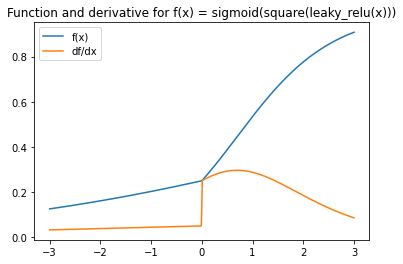

In [221]:
sns.lineplot(x=x, y=chain_length_3(function_chain, x))
sns.lineplot(x=x, y=derivs)
plt.title("Function and derivative for f(x) = sigmoid(square(leaky_relu(x)))")
plt.legend(labels=['f(x)', 'df/dx'])
plt.show()


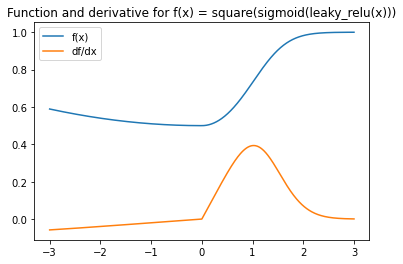

In [222]:
function_chain = [sigmoid, square, leaky_relu]
derivs = chain_rule_3(function_chain, x)

sns.lineplot(x=x, y=chain_length_3(function_chain, x))
sns.lineplot(x=x, y=derivs)
plt.title("Function and derivative for f(x) = square(sigmoid(leaky_relu(x)))")
plt.legend(labels=['f(x)', 'df/dx'])
plt.show()
